In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns
from pprint import pprint as pr
from sklearn.metrics import mutual_info_score as mutual_info

In [3]:
!ls ../data

test.csv
train.csv


In [4]:
df = pd.DataFrame.from_csv('../data/train.csv')
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
sdf=df[df.Survived==1]
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


([<matplotlib.patches.Wedge at 0x7226c70>,
 [<matplotlib.text.Text at 0x7226fb0>, <matplotlib.text.Text at 0x7381510>])

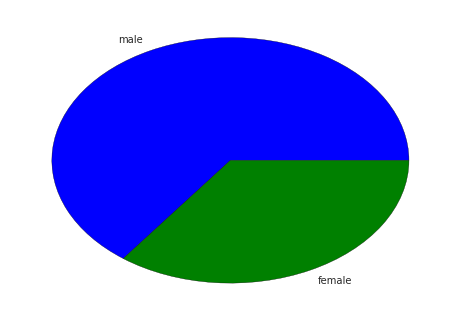

In [5]:
plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index)

(array([  64.,  115.,  230.,  155.,   86.,   42.,   17.,    5.,    0.,  177.]),
 array([   0.42 ,   10.378,   20.336,   30.294,   40.252,   50.21 ,
          60.168,   70.126,   80.084,   90.042,  100.   ]),
 <a list of 10 Patch objects>)

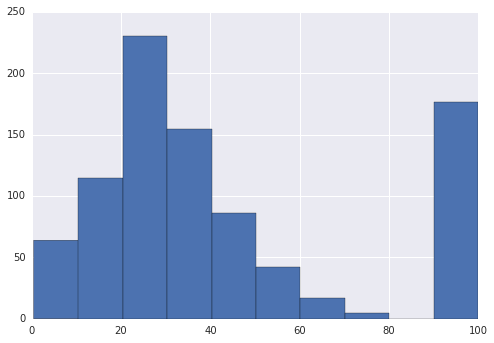

In [6]:
plt.hist(df.Age.fillna(100).values)

In [7]:
pd.isnull(df.Age).sum()/float(df.shape[0])

0.19865319865319866

In [8]:
pd.crosstab(df['Survived'],[df['Sex']])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [9]:
pd.crosstab(df['Survived'],[df['Sex'],df['Age'].apply(lambda x: round(x/10.0)*10 if x>0 else x)])

Sex      female                               male                           \
Age        0.0  10.0 20.0 30.0 40.0 50.0 60.0 0.0  10.0 20.0 30.0 40.0 50.0   
Survived                                                                      
0             5   10   17   16    9    6    1    8   10  110  107   60   37   
1            12   12   61   47   36   20    9   15    6   12   31   15   10   

Sex                      
Age      60.0 70.0 80.0  
Survived                 
0          18   10    0  
1           3    0    1

c:\python27\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


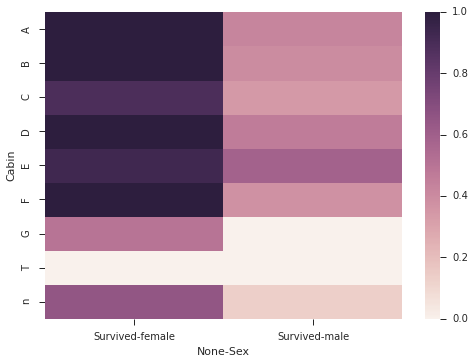

In [26]:
df['Cabin']=df['Cabin'].apply(lambda s:str(s)[0])
sns.heatmap(pd.pivot_table(df, index=['Cabin'], columns=['Sex'],values=['Survived'],aggfunc=np.mean, fill_value=0))

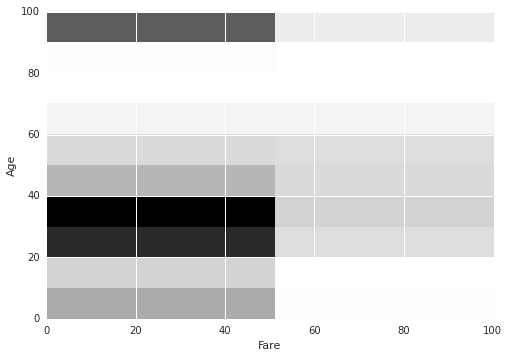

In [11]:
plt.figure()
plt.hist2d(\
           df['Fare'][df['Survived']==1],\
           df['Age'][df['Survived']==1].apply(lambda x: round(x/10.0)*10 if x>0 else 100)\
          )
plt.xlim(0, 100);
plt.ylim(0, 100);
plt.ylabel('Age')
plt.xlabel('Fare')

In [12]:
pd.crosstab(df['Survived'],[df['Cabin'].dropna().apply(lambda x:str(x)[0])])

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0


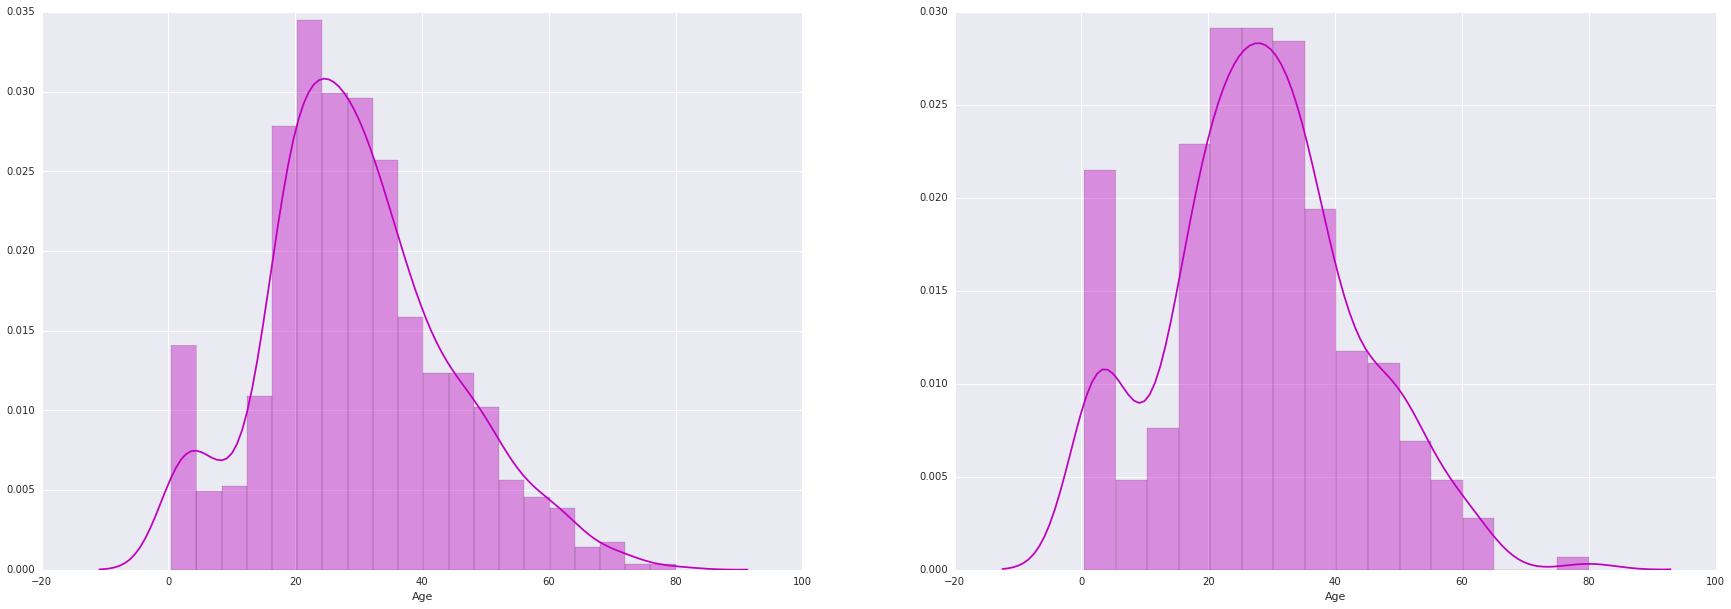

In [13]:
f,axes=plt.subplots(1,2,figsize=(30,10))
sns.distplot(df['Age'].dropna(),color="m", ax=axes[0])
sns.distplot(sdf['Age'].dropna(),color="m", ax=axes[1])

c:\python27\lib\site-packages\matplotlib\collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


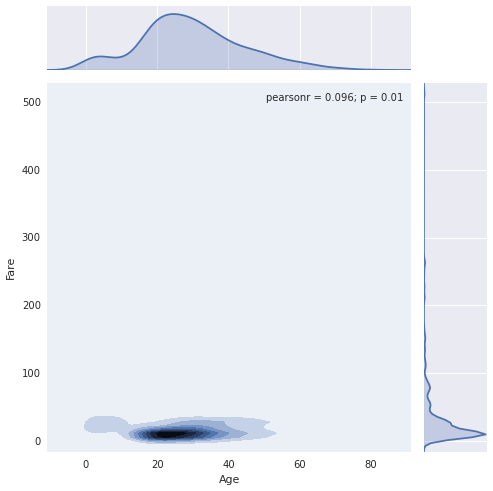

In [14]:
sns.jointplot(df['Age'], df['Fare'], kind="kde", size=7)

In [15]:
mi=[]
for c in df.columns:
    mi.append((mutual_info(df['Survived'][~pd.isnull(df[c])],df[c].dropna()),c))
pr (sorted (mi,reverse=True))

[(0.66591197352676557, 'Name'),
 (0.66591197352676512, 'Survived'),
 (0.57249584808267195, 'Ticket'),
 (0.50649925196416656, 'Cabin'),
 (0.30298972074861064, 'Fare'),
 (0.15087048925218183, 'Sex'),
 (0.088085851721101602, 'Age'),
 (0.058107252690322631, 'Pclass'),
 (0.023197086279639081, 'SibSp'),
 (0.016365584523616177, 'Parch'),
 (0.0145474261390207, 'Embarked')]


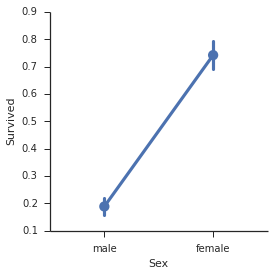

In [19]:
sns.set(style="ticks")
g = sns.factorplot(x="Sex", y="Survived", data=df)

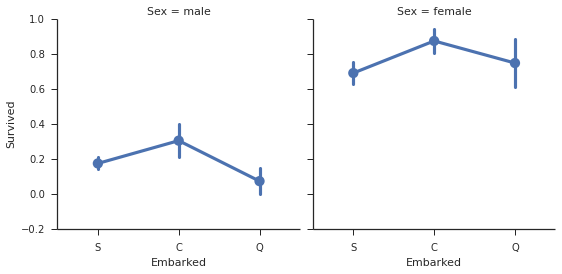

In [20]:
df["Embarked"] = df["Embarked"].fillna("S")
g = sns.factorplot(x="Embarked", y="Survived", col='Sex', data=df)

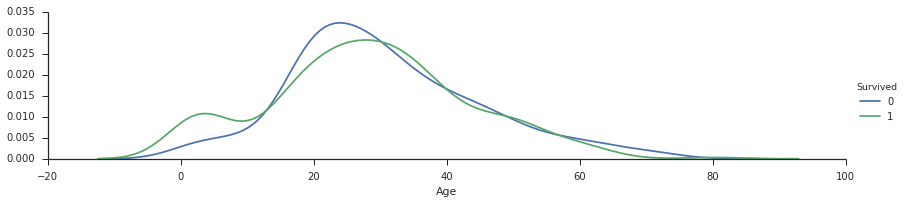

In [36]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age')
#facet.map(sns.kdeplot,'Fare')
facet.add_legend()